# simple analysis of clustering and temporal factor shape from TCA

In [3]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import pool
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import scipy as sp
import bottleneck as bt
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

# except: 
import tensortools as tt
from flow.misc import wordhash
from cascade import utils
from cascade import paths
from cascade import tca
from functools import reduce

In [5]:
mice=['OA27', 'OA67', 'OA32', 'OA34', 'OA36', 'OA26', 'VF226', 'CC175', 'AS57', 'CB173', 'AS47', 'AS41', 'AS23', 'AS20', 'OA38']
words = ['bookmarks']
words.extend(['horrible']*(len(mice)-1))

# load in a full size tensor
model_list = []
tensor_list = []
id_list = []
bhv_list = []
meta_list = []
for mouse, word in zip(mice, words):
    out = cas.load.load_all_groupday(mouse, word=word, with_model=True, group_by='all3', nan_thresh=0.95)  # return   model, ids, tensor, meta, bhv
    model_list.append(out[0])
    tensor_list.append(out[2])
    id_list.append(out[1])
    bhv_list.append(out[4])
    meta_list.append(cas.utils.add_10stages_to_meta(out[3], simple=False))

Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

In [6]:
cell_fac10 = model_list[0].results[10][0].factors[0]
std_fac10 = np.std(cell_fac10, axis=0)

bin_map = np.zeros(cell_fac10.shape)
for i in range(bin_map.shape[1]):
    bin_map[:,i] = cell_fac10[:, i] > std_fac10[i]

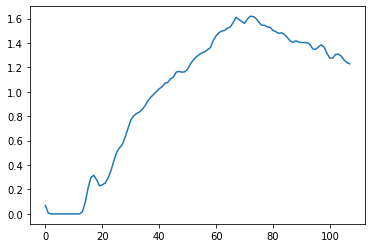

In [7]:
plt.plot(model_list[0].results[10][0].factors[1][:, 1])

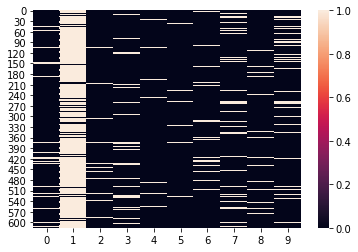

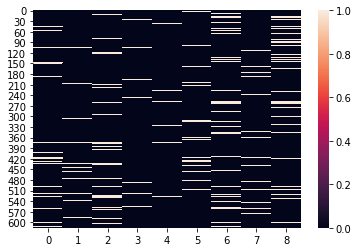

In [8]:
plt.figure()
sns.heatmap(bin_map)
plt.figure()
bin_map_clean = np.delete(bin_map, 1, axis=1)
sns.heatmap(bin_map_clean)

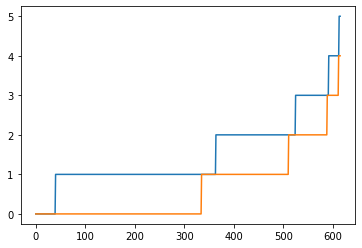

In [9]:
plt.plot(sorted(np.sum(bin_map, axis=1)))
plt.plot(sorted(np.sum(bin_map_clean, axis=1)))

In [41]:
sns.color_palette('hls', 5)

[(0.86, 0.3712, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86)]

## What fraction of cells have >1 std weights to another component?

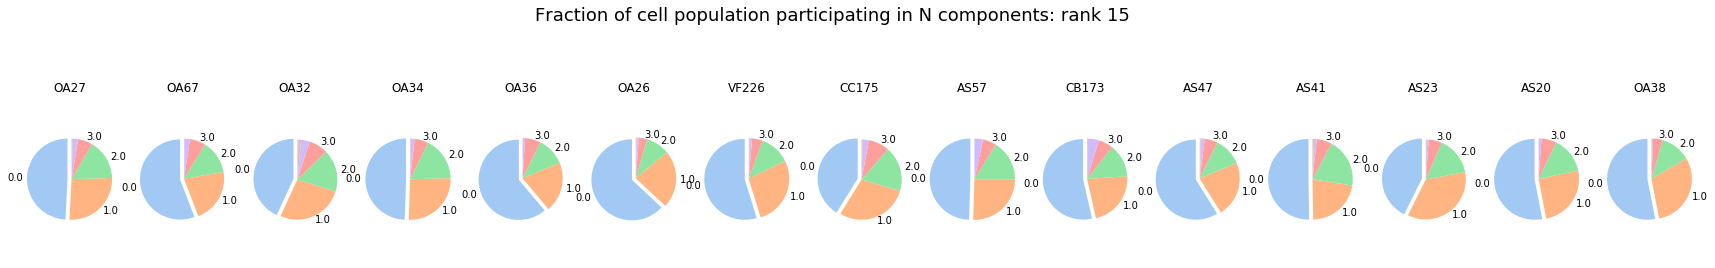

In [10]:
rank = 15

fig1, ax = plt.subplots(1, len(mice), figsize=(30, 3))
count = 0
for mi, modi in zip(mice, model_list):
    cell_fac10 = modi.results[rank][0].factors[0]
    std_fac10 = np.std(cell_fac10, axis=0)
    bin_map = np.zeros(cell_fac10.shape)
    for i in range(bin_map.shape[1]):
        bin_map[:,i] = cell_fac10[:, i] > std_fac10[i]

    junk_comp = np.argmax(np.sum(bin_map, axis=0))
    bin_map_clean = np.delete(bin_map, junk_comp, axis=1)
    count_vec = np.sort(np.sum(bin_map_clean, axis=1))
    labels = np.unique(count_vec)
    sizes = [np.sum(np.isin(count_vec, s)) for s in labels]
    explode = np.zeros(len(labels))  # only "explode" the 2nd slice (i.e. 'Hogs')
    explode[0] = 0.1
    labels = ['' if s > 3 else s for s in labels]

#     fig1, ax1 = plt.subplots()
    ax[count].pie(sizes, labels=labels, explode=explode, #autopct='%1.1f%%',
            shadow=False, startangle=90, colors=sns.color_palette('pastel',len(labels)))
    ax[count].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax[count].set_title('Comp. participation per cell: {}'.format(mi))
    ax[count].set_title('{}'.format(mi))
    count += 1
    
fig1.suptitle('Fraction of cell population participating in N components: rank {}'.format(rank), position=(0.5, 1.3), size=18);

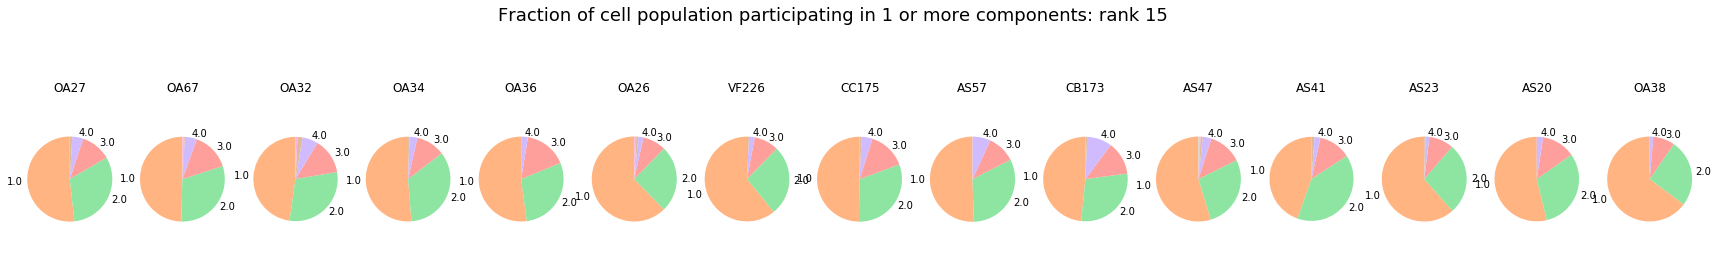

In [11]:
# rank = 15

fig1, ax = plt.subplots(1, len(mice), figsize=(30, 3))
count = 0
for mi, modi in zip(mice, model_list):
    cell_fac10 = modi.results[rank][0].factors[0]
    std_fac10 = np.std(cell_fac10, axis=0)
    bin_map = np.zeros(cell_fac10.shape)
    for i in range(bin_map.shape[1]):
        bin_map[:,i] = cell_fac10[:, i] > std_fac10[i]

    junk_comp = np.argmax(np.sum(bin_map, axis=0))
    bin_map_clean = np.delete(bin_map, junk_comp, axis=1)
    count_vec = np.sort(np.sum(bin_map_clean, axis=1))
    labels = np.unique(count_vec)
    sizes = [np.sum(np.isin(count_vec, s)) for s in labels]
    explode = np.zeros(len(labels))  # only "explode" the 2nd slice (i.e. 'Hogs')
    explode[0] = 0.1
    labels = ['' if s > 4 else s for s in labels]

#     fig1, ax1 = plt.subplots()
    ax[count].pie(sizes[1:], labels=labels[1:], explode=explode[1:], #autopct='%1.1f%%',
            shadow=False, startangle=90, colors=sns.color_palette('pastel',len(labels))[1:])
    ax[count].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax[count].set_title('Comp. participation per cell: {}'.format(mi))
    ax[count].set_title('{}'.format(mi))
    count += 1
    
fig1.suptitle('Fraction of cell population participating in 1 or more components: rank {}'.format(rank), position=(0.5, 1.3), size=18);

## What fraction of components have a sus vs trans vs offset response? 

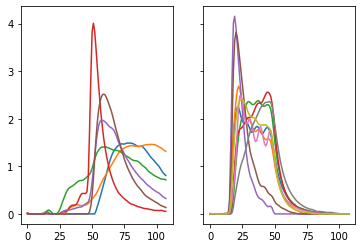

In [17]:
off_bool = np.argmax(modi.results[rank][0].factors[1][:, :], axis=0) > 15.5 * (1 + cas.lookups.stim_length[mouse])
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(modi.results[rank][0].factors[1][:, off_bool]);
ax[1].plot(modi.results[rank][0].factors[1][:, ~off_bool]);

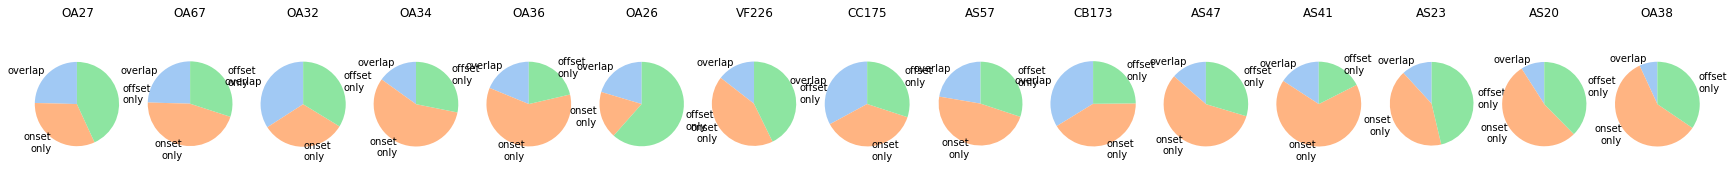

In [47]:
rank = 15

fig1, ax = plt.subplots(1, len(mice), figsize=(30, 3))
count = 0

for mi, modi in zip(mice, model_list):
    
    off_bool = np.argmax(modi.results[rank][0].factors[1][:, :], axis=0) > 15.5 * (1 + cas.lookups.stim_length[mouse])
    
    cell_fac = modi.results[rank][0].factors[0]
    std_fac = np.std(cell_fac, axis=0)
    
    bin_map_off = np.zeros(cell_fac.shape)
    bin_map = np.zeros(cell_fac.shape)
    for i in range(bin_map.shape[1]):
#         bin_map[:,i] = (cell_fac[:, i] > std_fac[i]) & off_bool[i]  # only offset responses
        bin_map[:,i] = (cell_fac[:, i] > std_fac[i])  # only non offset responses

    junk_comp = np.argmax(np.sum(bin_map, axis=0))
    off_clean =  np.delete(off_bool, junk_comp)
    bin_map_clean = np.delete(bin_map, junk_comp, axis=1)
    
    # offset minus junk comp
    offset_vec_cells = np.sum(bin_map_clean[:, off_clean], axis=1)
    # onset/sus minus junk comp
    onset_vec_cells = np.sum(bin_map_clean[:, ~off_clean], axis=1)
    
    overlap = np.sum((onset_vec_cells > 0) & (offset_vec_cells > 0))
    onset_only = np.sum((onset_vec_cells > 0) & ~(offset_vec_cells > 0))
    offset_only = np.sum(~(onset_vec_cells > 0) & (offset_vec_cells > 0))
    
    labels = ['overlap', 'onset\nonly', 'offset\nonly']
    sizes = [overlap, onset_only, offset_only]
    
    explode = np.zeros(len(labels))  # only "explode" the 2nd slice (i.e. 'Hogs')
    explode[0] = 0.0
#     labels = ['' if s > 3 else s for s in labels]

#     fig1, ax1 = plt.subplots()
    ax[count].pie(sizes, labels=labels, explode=explode, #autopct='%1.1f%%',
            shadow=False, startangle=90, colors=sns.color_palette('pastel',len(labels)))
    ax[count].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax[count].set_title('Comp. participation per cell: {}'.format(mi))
    ax[count].set_title('{}'.format(mi))
    count += 1
#     break
    
# fig1.suptitle('Fraction of cell population participating in N components (no offset): rank {}'.format(rank), position=(0.5, 1.3), size=18);

## What fraction of cells have a component with a sus vs trans vs offset response? 

In [30]:
junk_comp

14